In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas_datareader
import datetime

In [3]:
s=pd.read_csv("/Users/dhruvrao/reliance.csv")

In [4]:
s.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [5]:
s=s.drop(['Date', 'Symbol', 'Series', 'Prev Close', 'Last','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble'],axis=1)

In [6]:
s.head()

,Open,High,Low,Close,Volume
0,237.50,251.70,237.50,251.70,4456424
1,258.40,271.85,251.30,271.85,9487878
2,256.65,287.90,256.65,282.50,26833684
3,289.00,300.70,289.00,294.35,15682286
4,295.00,317.90,293.00,314.55,19870977


In [7]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5075 non-null   float64
 1   High    5075 non-null   float64
 2   Low     5075 non-null   float64
 3   Close   5075 non-null   float64
 4   Volume  5075 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 198.4 KB


In [8]:
s.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
s.shape

(5075, 5)

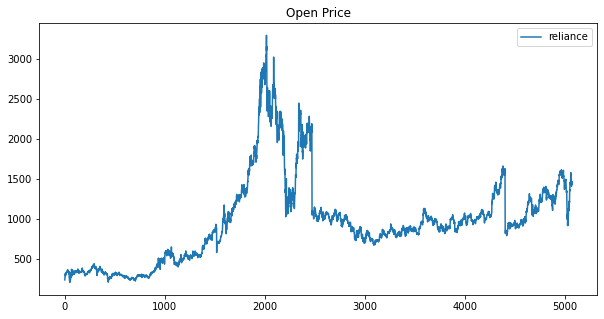

In [10]:
s['Open'].plot(label='reliance',figsize=(10,5),title='Open Price')
plt.legend()

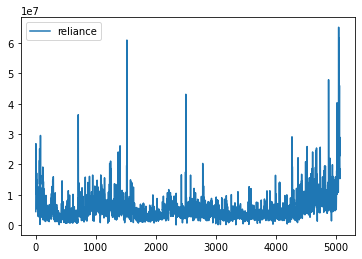

In [11]:
s['Volume'].plot(label='reliance')
plt.legend()

In [12]:
s['Volume'].argmax()

5049

In [13]:
from pandas.plotting import scatter_matrix

In [14]:
a = pd.concat([s['Open']],axis=1)

In [15]:
a.columns = ['reliance Open']

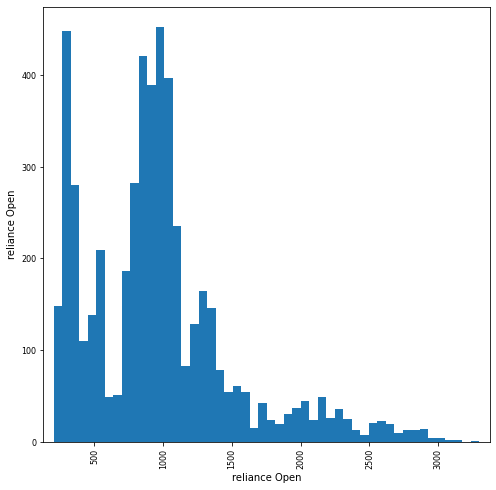

In [16]:
scatter_matrix(a,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [17]:
s['returns'] = (s['Close'] / s['Close'].shift(1) ) - 1

In [18]:
s.head()

,Open,High,Low,Close,Volume,returns
0,237.50,251.70,237.50,251.70,4456424,NaN
1,258.40,271.85,251.30,271.85,9487878,0.080056
2,256.65,287.90,256.65,282.50,26833684,0.039176
3,289.00,300.70,289.00,294.35,15682286,0.041947
4,295.00,317.90,293.00,314.55,19870977,0.068626


In [19]:
s=s.dropna(axis=0)

In [20]:
s.head()

,Open,High,Low,Close,Volume,returns
1,258.40,271.85,251.30,271.85,9487878,0.080056
2,256.65,287.90,256.65,282.50,26833684,0.039176
3,289.00,300.70,289.00,294.35,15682286,0.041947
4,295.00,317.90,293.00,314.55,19870977,0.068626
5,317.40,318.70,305.30,308.50,13417057,-0.019234


In [21]:
s.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
returns    0
dtype: int64

# HEAT MAP

<AxesSubplot:>

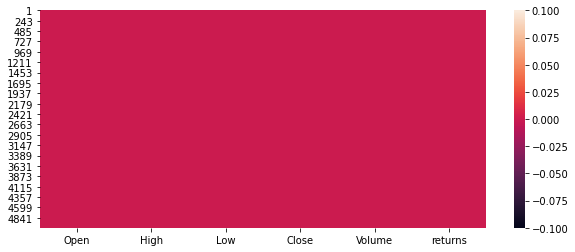

In [22]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(s.isnull())

In [23]:
input_data=s.drop("returns",axis=1)
input_data.head()

,Open,High,Low,Close,Volume
1,258.40,271.85,251.30,271.85,9487878
2,256.65,287.90,256.65,282.50,26833684
3,289.00,300.70,289.00,294.35,15682286
4,295.00,317.90,293.00,314.55,19870977
5,317.40,318.70,305.30,308.50,13417057


In [24]:
output_data=s["returns"]
output_data.head()

1    0.080056
2    0.039176
3    0.041947
4    0.068626
5   -0.019234
Name: returns, dtype: float64

# REGRESSION

In [25]:
from sklearn.model_selection import train_test_split
input_train,input_test,output_train,output_test=train_test_split(input_data,output_data,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(input_train,output_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lr.score(input_test, output_test)

0.3154903312999604

In [29]:
import pickle

In [30]:
pickle.dump(lr, open(r'/Users/dhruvrao/reliancemarket.sav','wb'))

In [31]:
input_data[["Open",'High','Low','Close']]

,Open,High,Low,Close
1,258.40,271.85,251.30,271.85
2,256.65,287.90,256.65,282.50
3,289.00,300.70,289.00,294.35
4,295.00,317.90,293.00,314.55
5,317.40,318.70,305.30,308.50
...,...,...,...,...
5070,1451.80,1458.00,1426.50,1431.55
5071,1448.15,1449.70,1416.30,1424.05
5072,1431.00,1454.00,1412.00,1445.55
5073,1455.00,1479.75,1449.00,1472.25


In [32]:
lr_3 = LinearRegression()

In [33]:
lr_3.fit(input_train[["Open",'High','Low','Close']], output_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr_3.score(input_test[["Open",'High','Low','Close']], output_test)

0.31407429915174456

In [35]:
pickle.dump(lr_3, open(r'/Users/dhruvrao/reliancemarket.sav','wb'))

In [36]:
with open(r'/Users/dhruvrao/reliancemarket.sav', 'rb') as pickled:
    data = pickle.load(pickled)

In [37]:
data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
input_test.shape

(1015, 5)

In [39]:
data.score(input_test[["Open",'High','Low','Close']], output_test)

0.31407429915174456

In [43]:
data.predict([[256.65,287.90,256.65,282.50]])

array([0.01716296])